# Siddhant Sehgal

# Task-5 Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

In [1]:
import plotly
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from matplotlib import cm
from math import log10
from matplotlib.colors import rgb2hex

In [2]:
df=pd.read_csv(r'G:\Study Material\Projects\Indian Premiere League Analysis\matches.csv')
df=df[df['result']=='normal']
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#IPL teams
print("Teams before preprocessing:",df.team1.unique())
df=df.replace('Rising Pune Supergiant','Rising Pune Supergiants')
df=df.replace('Delhi Daredevils','Delhi Capitals')
print()
print("Teams before preprocessing:",df.team1.unique())

Teams before preprocessing: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']

Teams before preprocessing: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors']


In [4]:
#Team Colors
team_colors={'Sunrisers Hyderabad':'#e86629', 'Mumbai Indians':'#114180', 'Gujarat Lions':'#f7794e',
 'Rising Pune Supergiants':'#4c4776', 'Royal Challengers Bangalore':'#e33323',
 'Kolkata Knight Riders':'#321650', 'Delhi Capitals':'#2560ae', 'Kings XI Punjab':'#df2125',
 'Chennai Super Kings':'#f4e54c', 'Rajasthan Royals':'#e91a84', 'Deccan Chargers':'#283549',
 'Kochi Tuskers Kerala':'#ee6226', 'Pune Warriors':'#56c2d7'}
over_colors=["red","red","red","red","red","red","orange","orange","orange","orange","orange",
            "orange","orange","orange","orange","green","green","green","green","green"]

In [5]:
matches_per_team1=df.groupby('team2')['team2'].count()
matches_per_team2=df.groupby('team1')['team1'].count()

matches_per_team=matches_per_team1+matches_per_team2
matches_per_team

team2
Chennai Super Kings            163
Deccan Chargers                 75
Delhi Capitals                 173
Gujarat Lions                   29
Kings XI Punjab                174
Kochi Tuskers Kerala            14
Kolkata Knight Riders          175
Mumbai Indians                 185
Pune Warriors                   45
Rajasthan Royals               142
Rising Pune Supergiants         30
Royal Challengers Bangalore    175
Sunrisers Hyderabad            106
dtype: int64

In [6]:
matches_per_season=df.groupby('season')['season'].count()
matches_per_season

season
2008    58
2009    56
2010    59
2011    72
2012    74
2013    74
2014    59
2015    56
2016    60
2017    58
2018    60
2019    57
Name: season, dtype: int64

In [7]:
#Season colors
season_colors=['#1997f3','#3d90e2','#5786ce','#707ab6','#8072aa','#976590',
              '#9e6088','#ae5673','#c1475c','#d13d49','#e22d31','#f01917']

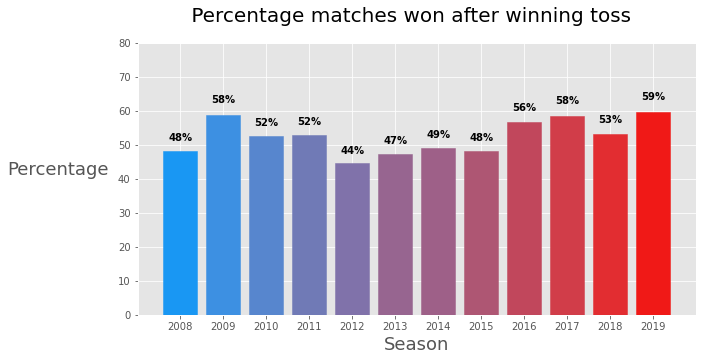

In [8]:
#% Matches won after winning toss by season
seasons=df['season'].unique()
teams=df['team1'].unique()
seasons=np.sort(seasons)
perc_win=[]
df_toss_match_winner=df[df['toss_winner']==df['winner']]
df_toss_match_winner_season=df_toss_match_winner.groupby('season')['season'].count()
df_toss_match_winner_team=df_toss_match_winner.groupby('winner')['winner'].count()

for i in seasons:
    perc_win.append((df_toss_match_winner_season[i]/matches_per_season[i])*100)

fig=plt.figure(figsize=(10,5))
plt.ylim(0,80)
rects=plt.bar(seasons,perc_win)
plt.xticks(seasons)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(int(height))+"%",ha='center', va='bottom',color='black',fontweight='bold')
for i in range(12):
    rects[i].set_color(season_colors[i])
    
fig.suptitle(' Percentage matches won after winning toss',fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Percentage', fontsize=18,rotation=0,labelpad=60)

plt.show()

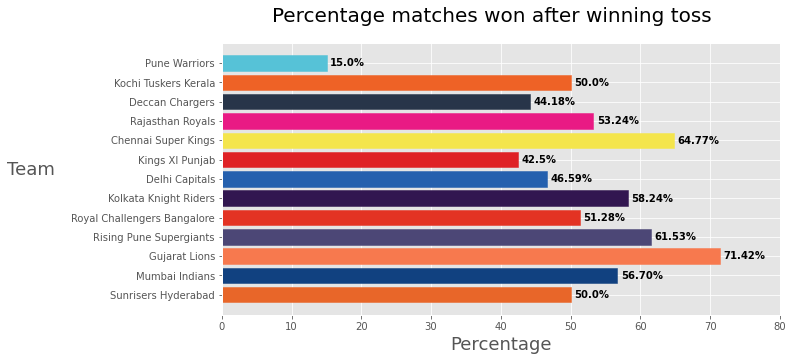

In [9]:
#% Matches won after winning toss by team
toss_wins=df.groupby('toss_winner')['toss_winner'].count()
perc_win=[]
for i in teams:
    perc_win.append((df_toss_match_winner_team[i]/toss_wins[i])*100)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(0,80)
rects=plt.barh(teams,perc_win)

for i, v in enumerate(perc_win):
    ax.text(v+0.5 , i + .25, str(v)[:5]+"%", color='black', fontweight='bold',va='top')

fig.suptitle('Percentage matches won after winning toss',fontsize=20)
plt.xlabel('Percentage', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)

for i in range(13):
    rects[i].set_color(team_colors[teams[i]])

plt.show()

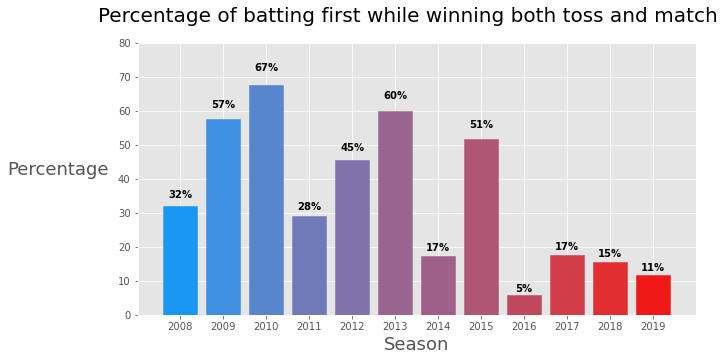

In [10]:
#Wins toss,bats first & wins match by season
toss_batting_first=df[(df['toss_winner']==df['winner']) & (df['toss_decision']=='bat')]
toss_batting_first_season=toss_batting_first.groupby('season')['season'].count()
win_perc=[]

for i in seasons:
    win_perc.append((toss_batting_first_season[i]/df_toss_match_winner_season[i])*100)

fig=plt.figure(figsize=(10,5))
plt.ylim(0,80)
rects=plt.bar(seasons,win_perc)
plt.xticks(seasons)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(int(height))+"%",ha='center', va='bottom',color='black',fontweight='bold')
for i in range(12):
    rects[i].set_color(season_colors[i])
    
fig.suptitle('Percentage of batting first while winning both toss and match',fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Percentage', fontsize=18,rotation=0,labelpad=60)

plt.show()

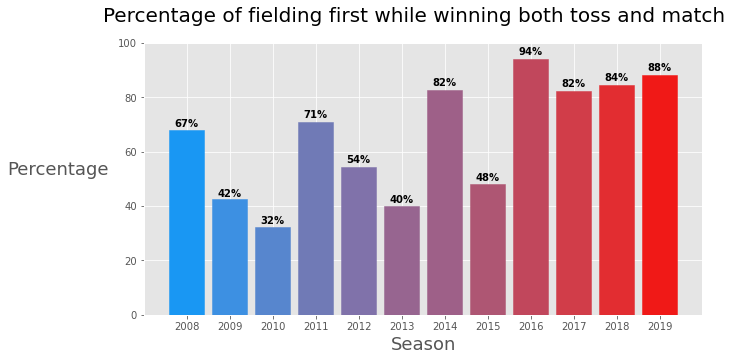

In [11]:
#Wins toss,fields first & wins match by season
toss_field_first=df[(df['toss_winner']==df['winner']) & (df['toss_decision']=='field')]
toss_field_first_season=toss_field_first.groupby('season')['season'].count()
win_perc=[]

for i in seasons:
    win_perc.append((toss_field_first_season[i]/df_toss_match_winner_season[i])*100)

fig=plt.figure(figsize=(10,5))
plt.ylim(0,100)
rects=plt.bar(seasons,win_perc)
plt.xticks(seasons)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.01*height, str(int(height))+"%",ha='center', va='bottom',color='black',fontweight='bold')
for i in range(12):
    rects[i].set_color(season_colors[i])
    
fig.suptitle('Percentage of fielding first while winning both toss and match',fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Percentage', fontsize=18,rotation=0,labelpad=60)

plt.show()

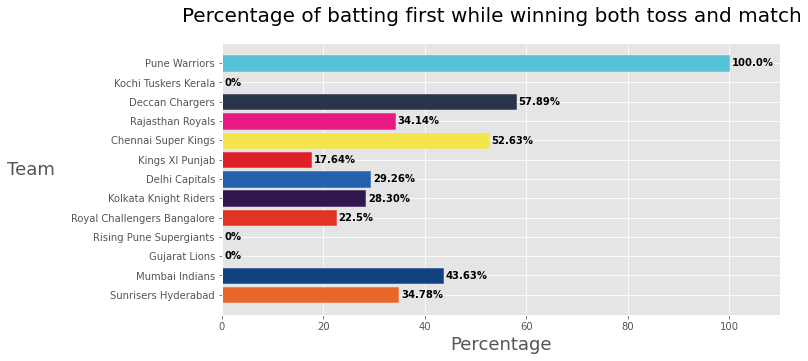

In [12]:
#Wins toss,bats first & wins match by team
toss_batting_first=df[(df['toss_winner']==df['winner']) & (df['toss_decision']=='bat')]
toss_batting_first_team=toss_batting_first.groupby('toss_winner')['toss_winner'].count()
win_perc=[]
for i in teams:
    if i in toss_batting_first_team.keys() and i in df_toss_match_winner_team.keys():
        win_perc.append((toss_batting_first_team[i]/df_toss_match_winner_team[i])*100)
    else:
        win_perc.append(0)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(0,110)
rects=plt.barh(teams,win_perc)

for i, v in enumerate(win_perc):
    ax.text(v+0.5 , i + .25, str(v)[:5]+"%", color='black', fontweight='bold',va='top')

fig.suptitle('Percentage of batting first while winning both toss and match',fontsize=20)
plt.xlabel('Percentage', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)

for i in range(13):
    rects[i].set_color(team_colors[teams[i]])

plt.show()

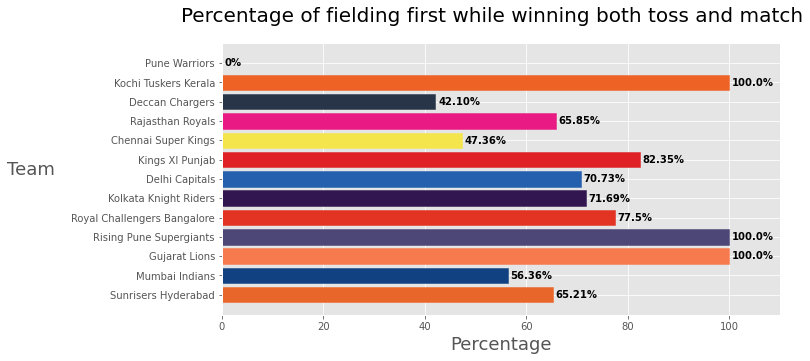

In [13]:
#Wins toss,fields first & wins match by team
toss_field_first=df[(df['toss_winner']==df['winner']) & (df['toss_decision']=='field')]
toss_field_first_season=toss_field_first.groupby('toss_winner')['toss_winner'].count()
win_perc=[]

for i in teams:
    if i in toss_field_first_season.keys() and i in df_toss_match_winner_team.keys():
        win_perc.append((toss_field_first_season[i]/df_toss_match_winner_team[i])*100)
    else:
        win_perc.append(0)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(0,110)
rects=plt.barh(teams,win_perc)

for i, v in enumerate(win_perc):
    ax.text(v+0.5 , i + .25, str(v)[:5]+"%", color='black', fontweight='bold',va='top')

fig.suptitle('Percentage of fielding first while winning both toss and match',fontsize=20)
plt.xlabel('Percentage', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)

for i in range(13):
    rects[i].set_color(team_colors[teams[i]])

plt.show()

In [26]:
df_deliveries=pd.read_csv(r'G:\Study Material\Projects\Indian Premiere League Analysis\deliveries.csv')
df_deliveries=df_deliveries[df_deliveries['is_super_over']==0]
df_deliveries['wicket']=(df_deliveries['player_dismissed'].notnull()).astype('int')
df_deliveries=df_deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants')
df_deliveries=df_deliveries.replace('Delhi Daredevils','Delhi Capitals')
df_deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,wicket
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,NaN,NaN,NaN,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,1,0,1,NaN,NaN,NaN,0
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,2,0,2,NaN,NaN,NaN,0
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,1
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,2,0,2,NaN,NaN,NaN,0


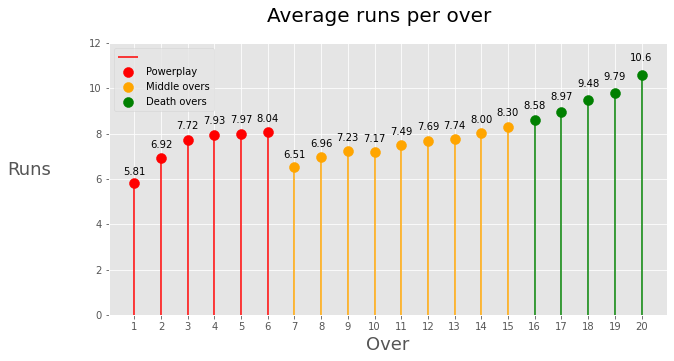

In [27]:
#Average runs per over
total_matches=len(df_deliveries['match_id'].unique())
overs=df_deliveries['over'].unique()
over_bowled=df_deliveries.groupby('over')['over'].count()/6
over_runs=df_deliveries.groupby('over').agg({'total_runs': 'sum'}).total_runs
rpo=over_runs/over_bowled

fig=plt.figure(figsize=(10,5))
plt.ylim(0,12)
rects=plt.bar(rpo.keys(),rpo.values,width=0)
plt.xticks(rpo.keys())

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(height)[:4],ha='center', va='bottom',color='black')

plt.vlines(rpo.keys(),0,rpo.values,color=over_colors,linestyles='solid')
plt.scatter(rpo.keys()[:6],rpo.values[:6], marker="o",s=100,color="red")
plt.scatter(rpo.keys()[6:15],rpo.values[6:15], marker="o",s=100,color="orange")
plt.scatter(rpo.keys()[15:],rpo.values[15:], marker="o",s=100,color="green")
    
    
fig.suptitle('Average runs per over',fontsize=20)
plt.xlabel('Over', fontsize=18)
plt.ylabel('Runs', fontsize=18,rotation=0,labelpad=60)

plt.legend(["", "Powerplay","Middle overs","Death overs"])
plt.show()

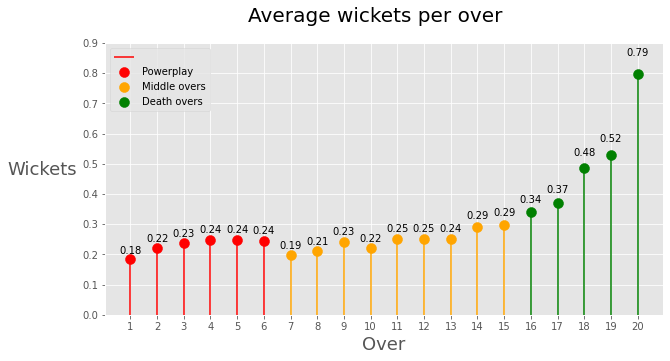

In [28]:
#Average wickets per over
over_wickets=df_deliveries.groupby('over').agg({'wicket': 'sum'}).wicket
wpo=over_wickets/over_bowled

fig=plt.figure(figsize=(10,5))
plt.ylim(0,0.9)
rects=plt.bar(wpo.keys(),wpo.values,width=0)
plt.xticks(wpo.keys())

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.07*height, str(height)[:4],ha='center', va='bottom',color='black')

plt.vlines(wpo.keys(),0,wpo.values,color=over_colors,linestyles='solid')
plt.scatter(wpo.keys()[:6],wpo.values[:6], marker="o",s=100,color="red")
plt.scatter(wpo.keys()[6:15],wpo.values[6:15], marker="o",s=100,color="orange")
plt.scatter(wpo.keys()[15:],wpo.values[15:], marker="o",s=100,color="green")
    
    
fig.suptitle('Average wickets per over',fontsize=20)
plt.xlabel('Over', fontsize=18)
plt.ylabel('Wickets', fontsize=18,rotation=0,labelpad=40)

plt.legend(["", "Powerplay","Middle overs","Death overs"])
plt.show()


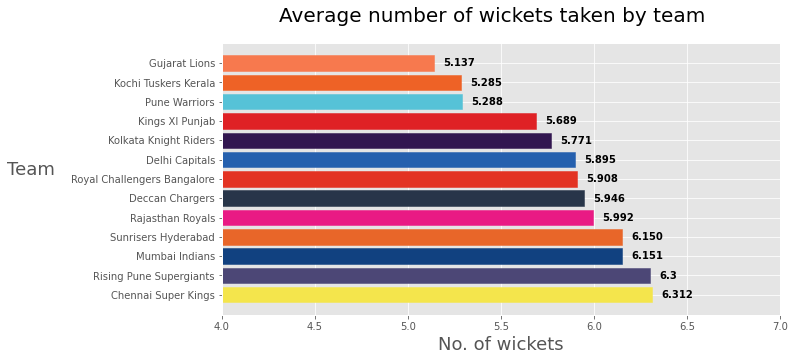

In [29]:
#Wickets by team per match
team_wickets=df_deliveries.groupby('bowling_team').agg({'wicket':'sum'}).wicket
wpm=(team_wickets/matches_per_team).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(4,7)
rects=plt.barh(wpm.keys(),wpm.values)

for i, v in enumerate(wpm.values):
    ax.text(v+0.05 , i + .25, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle('Average number of wickets taken by team',fontsize=20)
plt.xlabel('No. of wickets', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)

for i in range(13):
    rects[i].set_color(team_colors[wpm.keys()[i]])

plt.show()

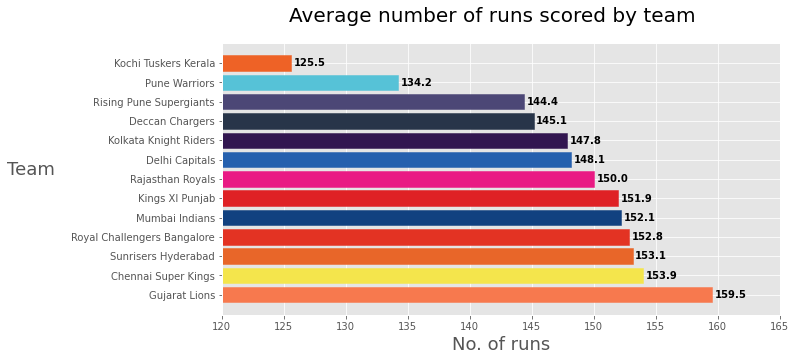

In [30]:
#Runs by team per match
team_run=df_deliveries.groupby('batting_team').agg({'batsman_runs': 'sum'}).batsman_runs
rpm = (team_run/matches_per_team).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(120,165)
rects=plt.barh(rpm.keys(),rpm.values)

for i, v in enumerate(rpm.values):
    ax.text(v+0.2 , i + .25, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle('Average number of runs scored by team',fontsize=20)
plt.xlabel('No. of runs', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)

for i in range(13):
    rects[i].set_color(team_colors[rpm.keys()[i]])

plt.show()

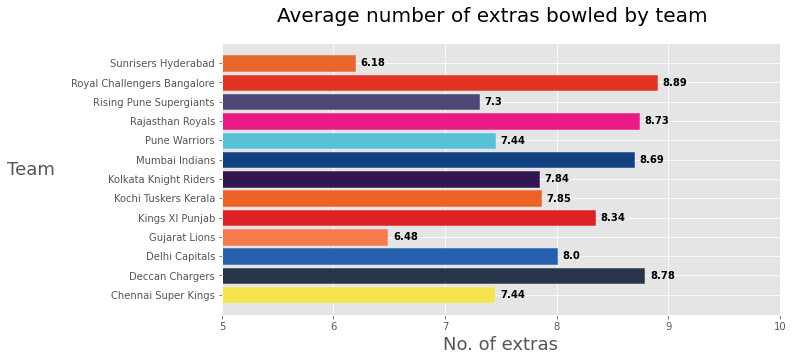

In [31]:
#Extras per match by team
team_extras=df_deliveries.groupby('bowling_team').agg({'extra_runs':'sum'}).extra_runs
expm=team_extras/matches_per_team

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(5,10)
rects=plt.barh(expm.keys(),expm.values)

for i, v in enumerate(expm.values):
    ax.text(v+0.05 , i + .25, str(v)[:4], color='black', fontweight='bold',va='top')

fig.suptitle('Average number of extras bowled by team',fontsize=20)
plt.xlabel('No. of extras', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)

for i in range(13):
    rects[i].set_color(team_colors[expm.keys()[i]])

plt.show()

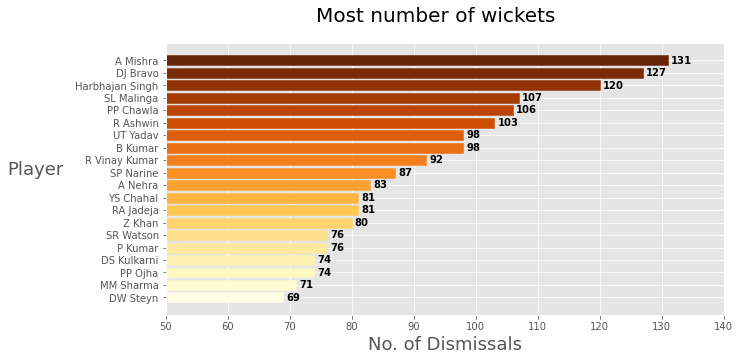

In [32]:
#Most wickets
bowler_wicket=df_deliveries[df_deliveries["dismissal_kind"].isin(["caught", "bowled ", "lbw","stumped","caught and bowled" ])]
bowler_wicket=bowler_wicket.groupby('bowler')['bowler'].count()
bowler_wicket=bowler_wicket.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(50,140)
rects=plt.barh(bowler_wicket.keys(),bowler_wicket.values)

for i, v in enumerate(bowler_wicket.values):
    ax.text(v+0.5 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle('Most number of wickets',fontsize=20)
plt.xlabel('No. of Dismissals', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = cm.get_cmap('YlOrBr', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()


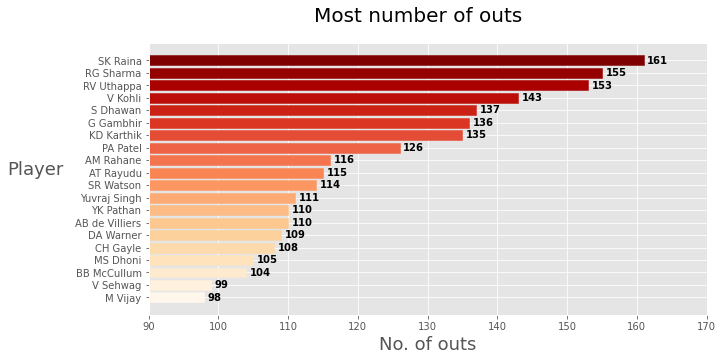

In [33]:
#Most Dismissals
most_dismissed=df_deliveries['player_dismissed'].value_counts()[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(90,170)
rects=plt.barh(most_dismissed.keys(),most_dismissed.values)

for i, v in enumerate(most_dismissed.values):
    ax.text(v+0.5 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle('Most number of outs',fontsize=20)
plt.xlabel('No. of outs', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = cm.get_cmap('OrRd', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()

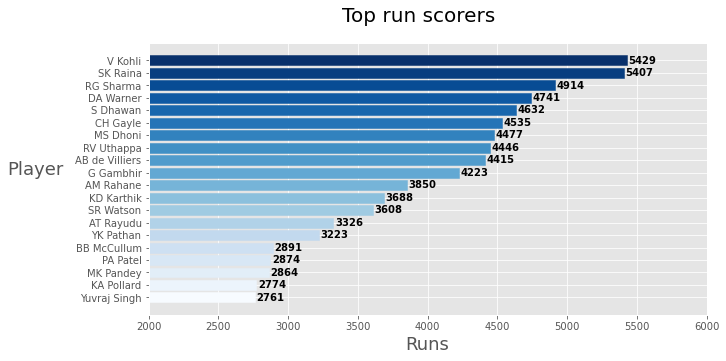

In [34]:
#Most runs scored
batsmen_runs=df_deliveries.groupby('batsman').agg({'batsman_runs': 'sum'}).batsman_runs
most_runs=batsmen_runs.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(2000,6000)
rects=plt.barh(most_runs.keys(),most_runs.values)

for i, v in enumerate(most_runs.values):
    ax.text(v+10 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle('Top run scorers',fontsize=20)
plt.xlabel('Runs', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = cm.get_cmap('Blues', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()

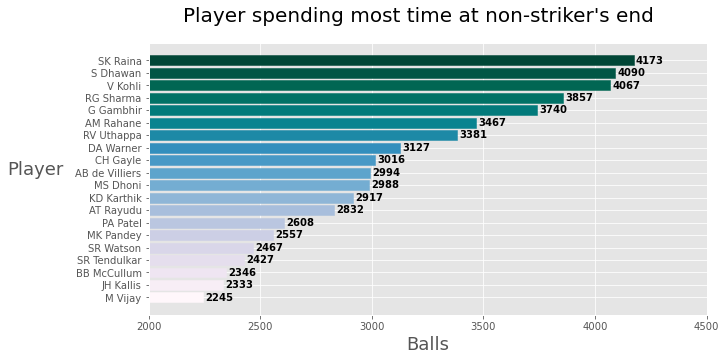

In [35]:
#Player spending most time at non-striker's end
nonstrike_balls=df_deliveries.groupby('non_striker').agg({'non_striker':'count'}).non_striker
bat_non=nonstrike_balls.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(2000,4500)
rects=plt.barh(bat_non.keys(),bat_non.values)

for i, v in enumerate(bat_non.values):
    ax.text(v+10 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle("Player spending most time at non-striker's end",fontsize=20)
plt.xlabel('Balls', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = cm.get_cmap('PuBuGn', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()

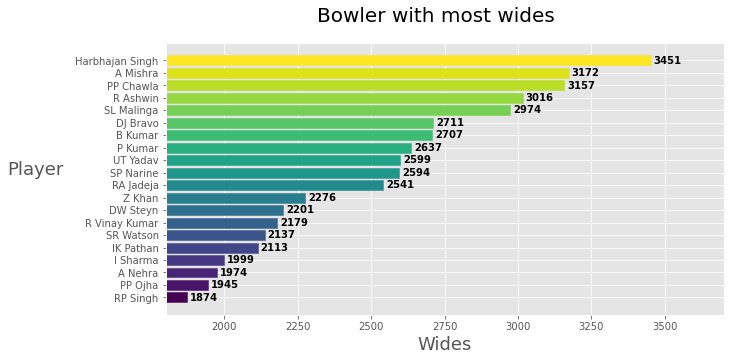

In [36]:
#Bowler with most wides
bowler_wides=df_deliveries.groupby('bowler').agg({'bowler':'count'}).bowler
bmw=bowler_wides.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(1800,3700)
rects=plt.barh(bmw.keys(),bmw.values)

for i, v in enumerate(bmw.values):
    ax.text(v+10 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle("Bowler with most wides",fontsize=20)
plt.xlabel('Wides', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = cm.get_cmap('viridis', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()

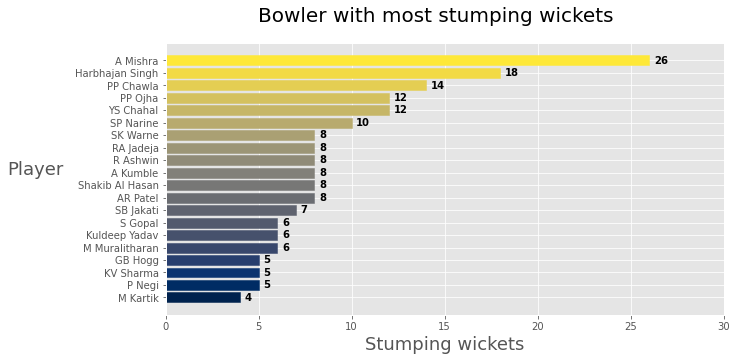

In [37]:
#Bowler with most stumping wickets
bowl_stump=df_deliveries[(df_deliveries['dismissal_kind'].isin(["stumped"])) & (df_deliveries['wicket']==1) ]
bowl_stump=bowl_stump.groupby('bowler').agg({'bowler':'count'}).bowler
bmsw= bowl_stump.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(0,30)
rects=plt.barh(bmsw.keys(),bmsw.values)

for i, v in enumerate(bmsw.values):
    ax.text(v + 0.25 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle("Bowler with most stumping wickets",fontsize=20)
plt.xlabel('Stumping wickets', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = cm.get_cmap('cividis', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()

In [38]:
#Concentric circles
# labels = bmsw.keys()[:10]
# data = bmsw.values[:10]
# n = 10
# k = 10 ** int(log10(max(data)))
# # m = k * (1 + max(data) // k)
# m = 26
# r = 3
# w = r / n 
# colors = [cm.terrain(i / n) for i in range(n)]
# fig, ax = plt.subplots()
# ax.axis("equal")

# #create rings of donut chart
# for i in range(n):
#     innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
#     plt.setp(innerring, width = w, edgecolor = "white")


# # fig.suptitle('Most stumping wickets')
# plt.xlabel('Most stumping wickets', fontsize=30,labelpad=-400)

# plt.legend()
# plt.show()